In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the current working directory of the script and read data
current_dir = os.getcwd()

In [31]:
df = pd.read_csv('C:/Users/esrio_0v2bwuf/Desktop/Master_AI/Data_Mining_Techniques/Assignments/Assignment2/Data-Mining-2/feature_engineering/Data/no_missing_values.csv')

df['month'] = pd.to_datetime(df['date_time']).dt.month
print(df.head())

   srch_id            date_time  site_id  visitor_location_country_id  \
0        1  2013-04-04 08:32:15       12                          187   
1        1  2013-04-04 08:32:15       12                          187   
2        1  2013-04-04 08:32:15       12                          187   
3        1  2013-04-04 08:32:15       12                          187   
4        1  2013-04-04 08:32:15       12                          187   

   prop_country_id  prop_id  prop_starrating  prop_review_score  \
0              219      893                3                3.5   
1              219    10404                4                4.0   
2              219    21315                3                4.5   
3              219    27348                2                4.0   
4              219    29604                4                3.5   

   prop_brand_bool  prop_location_score1  ...  comp8_rate_percent_diff  \
0                1                  2.83  ...                      0.0   
1         

In [42]:
#check missing values one more time
print(df.isnull().sum())

srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
orig_destination_distance      0
random_bool                    0
comp1_rate                     0
comp1_inv                      0
comp1_rate_percent_diff        0
comp2_rate                     0
comp2_inv                      0
comp2_rate_percent_diff        0
comp3_rate                     0
comp3_inv 

In [46]:
df.shape[0]

9917530

# Starting dingen

In [32]:
# normalise 'prop_log_historical_price' and 'price_usd' columns with respect to 'srch_id'
log_transform_cols = ['price_usd', 'orig_destination_distance', 'comp1_rate_percent_diff','comp2_rate_percent_diff',
                      'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff',
                      'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff']

norm_cols = ['prop_log_historical_price', 'price_usd', 'orig_destination_distance', 'comp1_rate_percent_diff',
             'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff',
             'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff']

wrt_cols = ['srch_id', 'prop_id', 'month', 'srch_booking_window', 'srch_destination_id', 'prop_country_id']


# perform log transformation

In [33]:
def log_transform(data, cols):
    for col in cols:
        # Replace zero and negative values with a small positive value before log transformation
        # data[col] = data[col].apply(lambda x: 1e-6 if x <= 0 else np.log1p(x))

        if (data[col] < 0).any():
            print(f"Non-positive values found in {col}. Cannot apply log transform.")

        data[col] = np.log1p(data[col])

    return data

In [34]:
df_norm = df.copy()
df_norm = log_transform(df_norm, log_transform_cols)


In [43]:
#check the amount of missing values per column
print(df_norm.isnull().sum())

srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
orig_destination_distance      0
random_bool                    0
comp1_rate                     0
comp1_inv                      0
comp1_rate_percent_diff        0
comp2_rate                     0
comp2_inv                      0
comp2_rate_percent_diff        0
comp3_rate                     0
comp3_inv 

### check for missing values

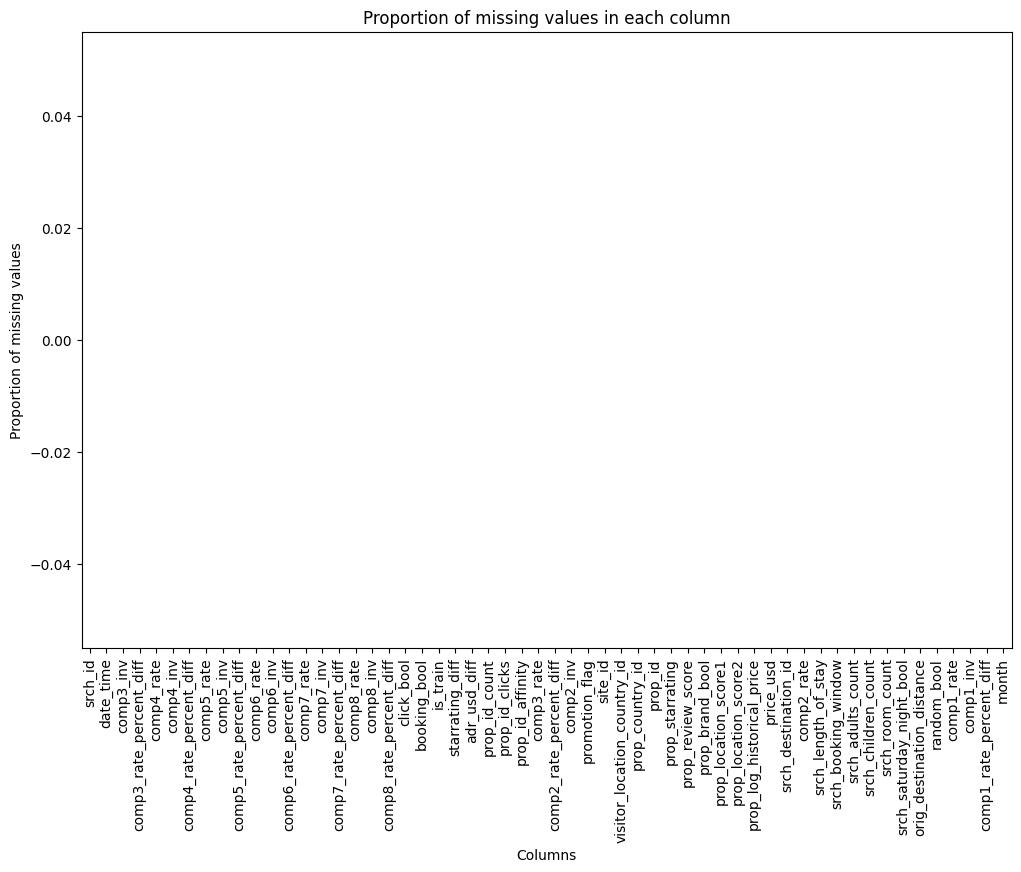

In [44]:
#plot number of missing values in each column using bar plot matplotlib
missing_values = df_norm.isnull().sum().sort_values(ascending=False)

#create barplot
plt.figure(figsize=(12,8))  # Optional: You can set the figure size
missing_values.plot(kind='bar')

#rotate the x-axis labels
plt.title('Proportion of missing values in each column')
plt.xlabel('Columns')
plt.ylabel('Proportion of missing values')
plt.show()

In [45]:
#print for each feature the amount of missing values
print(missing_values)

srch_id                        0
date_time                      0
comp3_inv                      0
comp3_rate_percent_diff        0
comp4_rate                     0
comp4_inv                      0
comp4_rate_percent_diff        0
comp5_rate                     0
comp5_inv                      0
comp5_rate_percent_diff        0
comp6_rate                     0
comp6_inv                      0
comp6_rate_percent_diff        0
comp7_rate                     0
comp7_inv                      0
comp7_rate_percent_diff        0
comp8_rate                     0
comp8_inv                      0
comp8_rate_percent_diff        0
click_bool                     0
booking_bool                   0
is_train                       0
starrating_diff                0
adr_usd_diff                   0
prop_id_count                  0
prop_id_clicks                 0
prop_id_affinity               0
comp3_rate                     0
comp2_rate_percent_diff        0
comp2_inv                      0
promotion_

# normalization

In [14]:
# def normalize(data, norm_cols, wrt_col):
#     for norm_col in norm_cols:
#         group_means = data.groupby(wrt_col)[norm_col].transform('mean')
#         group_stds = data.groupby(wrt_col)[norm_col].transform('std')

#         # Normalize the column only if the standard deviation is not zero
#         data[f'{norm_col}_norm_{wrt_col}'] = data[norm_col] - group_means
#         data.loc[group_stds != 0, f'{norm_col}_norm_{wrt_col}'] /= group_stds[group_stds != 0]

#         #print if any missing values are detected in the normalized column
#         if data[f'{norm_col}_norm_{wrt_col}'].isnull().any():
#             print(f"Missing values found in {norm_col}_norm_{wrt_col}")

#     return data

In [ ]:
def normalize(data, cols, respect):
    std_zero_count = 0

    def normalize_or_zero(x):
        nonlocal std_zero_count
        if x.std() == 0:
            std_zero_count += 1
            return 0
        else:
            return (x - x.mean()) / x.std()

    for col in cols:
        data[f'{col}_norm_{respect}'] = data.groupby(respect)[col].transform(normalize_or_zero)

        print(data[f'{col}_norm_{respect}'].isna().sum())
        
        #check if missing values are created
        if data[f'{col}_norm_{respect}'].isna().any():
            print(f"NaN values detected in column {col}_norm_{respect} after normalization.")

    print(f'Standard deviation was zero {std_zero_count} times.')

    return data

In [38]:
def normalise(data, cols, respect):
    # for col in cols:
    #     data[f'{col}_norm_{respect}'] = data.groupby(respect)[col].transform(lambda x: (x - x.mean()) / x.std())

    for col in cols:
        data[f'{col}_norm_{respect}'] = data.groupby(respect)[col].transform(lambda x: 0 if x.std() == 0 else (x - x.mean()) / x.std())

        print(data[f'{col}_norm_{respect}'].isna().sum())
        
        #check if missing values are created
        if data[f'{col}_norm_{respect}'].isna().any():
            print(f"NaN values detected in column {col}_norm_{respect} after normalization.")

    return data

In [28]:
#get a subset of the rows, random subset of 10% of the rows
df_subset = df_norm.sample(frac=0.1, random_state=42)

In [39]:
for wrt in wrt_cols:
    df_subset_norm = normalise(df_subset, norm_cols, wrt)

38557
NaN values detected in column prop_log_historical_price_norm_srch_id after normalization.
38557
NaN values detected in column price_usd_norm_srch_id after normalization.
38557
NaN values detected in column orig_destination_distance_norm_srch_id after normalization.
38557
NaN values detected in column comp1_rate_percent_diff_norm_srch_id after normalization.
38557
NaN values detected in column comp2_rate_percent_diff_norm_srch_id after normalization.
38557
NaN values detected in column comp3_rate_percent_diff_norm_srch_id after normalization.
38557
NaN values detected in column comp4_rate_percent_diff_norm_srch_id after normalization.
38557
NaN values detected in column comp5_rate_percent_diff_norm_srch_id after normalization.
38557
NaN values detected in column comp6_rate_percent_diff_norm_srch_id after normalization.
38557
NaN values detected in column comp7_rate_percent_diff_norm_srch_id after normalization.
38557
NaN values detected in column comp8_rate_percent_diff_norm_srch_

### check for missing values

In [ ]:
# df_norm.to_csv(os.path.join(current_dir, 'Data', 'df_norm.csv'), index=False)
# print('finished with df_norm.csv')

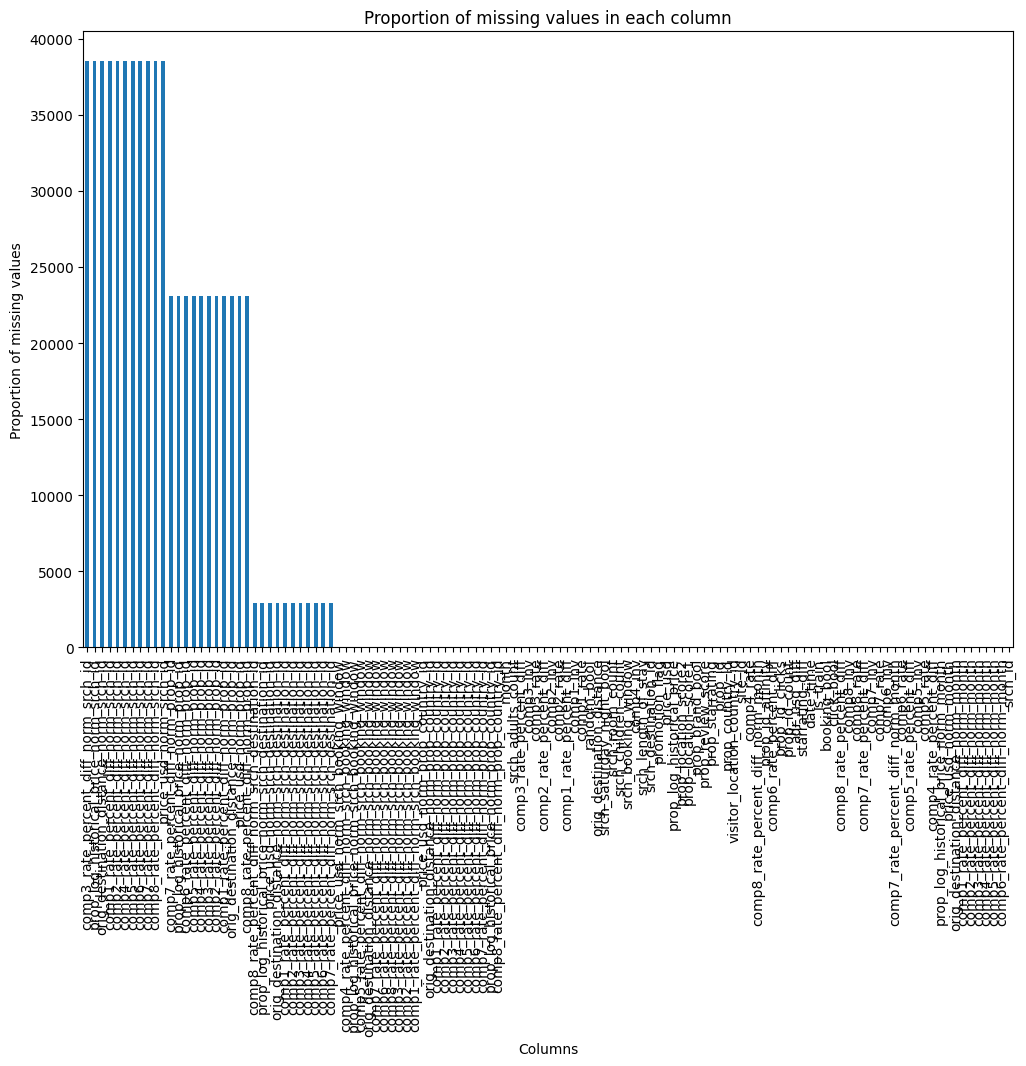

In [40]:
#plot number of missing values in each column using bar plot matplotlib
missing_values = df_subset_norm.isnull().sum().sort_values(ascending=False)

#create barplot
plt.figure(figsize=(12,8))  # Optional: You can set the figure size
missing_values.plot(kind='bar')

#rotate the x-axis labels
plt.title('Proportion of missing values in each column')
plt.xlabel('Columns')
plt.ylabel('Proportion of missing values')
plt.show()